# 20240915
초안
1. wf xy좌표 사용. 
2. ★ shot grid 수정해야함.  그냥 단순히 step pitch로 쪼개놓은것임. wafer정센터 0,0 기준으로 grid그려야함




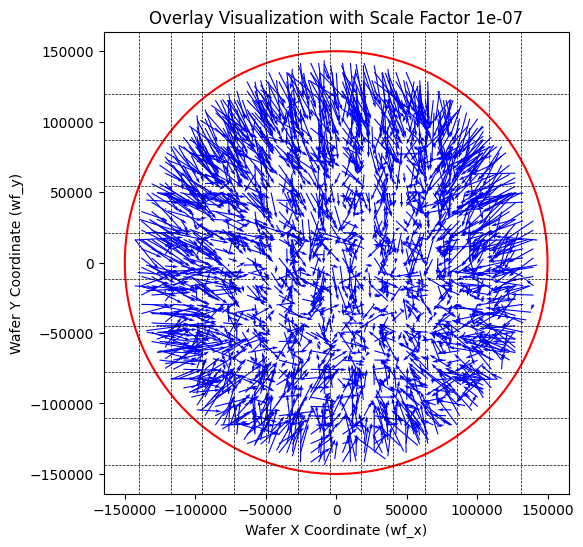

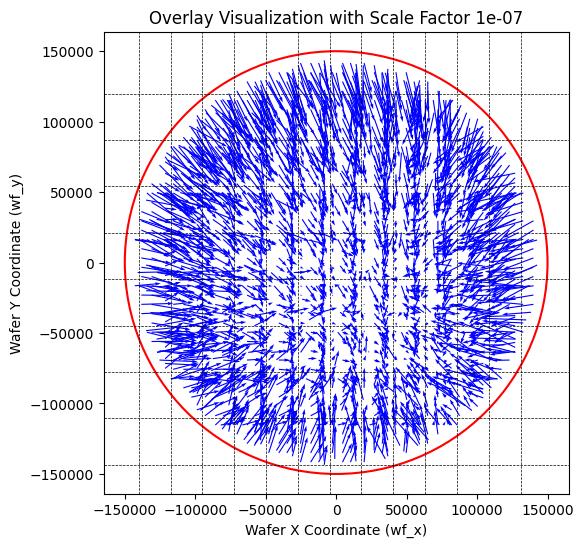

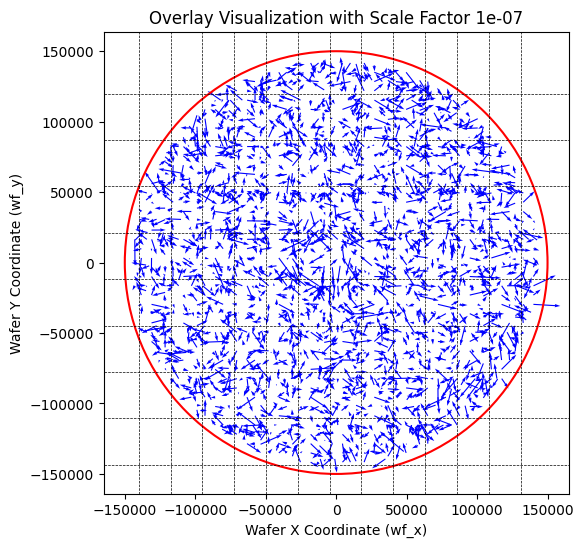

In [3]:

import matplotlib.pyplot as plt
import pandas as pd

# 엑셀 파일 읽기
file_path = 'C:/vscode/MODULE/output.xlsx'  # 실제 엑셀 파일 경로로 수정 필요
sheet_name = 'RawData-1'

df = pd.read_excel(file_path, sheet_name=sheet_name)

# 데이터 열 추출
wf_x = df['wf_x']
wf_y = df['wf_y']
overlay_x = df['X_reg']
overlay_y = df['Y_reg']
fit_x = df['pred_x']
fit_y = df['pred_y']
residual_x = df['residual_x']
residual_y = df['residual_y']

# STEP_PITCH_X, STEP_PITCH_Y 추출
step_pitch_x = df['STEP_PITCH_X'].iloc[0]
step_pitch_y = df['STEP_PITCH_Y'].iloc[0]
map_shift_x = df['MAP_SHIFT_X'].iloc[0]
map_shift_y = df['MAP_SHIFT_Y'].iloc[0]



# 웨이퍼 경계 설정
wafer_radius = 150000

# 시각화 함수
def plot_overlay(x, y, dx, dy, title='Wafer Vector Map', scale_factor=1e-7):
    plt.figure(figsize=(6, 6))

    # quiver 플롯 (overlay 값 화살표로 표시)
    plt.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=scale_factor, color='blue')

    # 수직선 추가 (step_pitch_x 기준)
    x_ticks = range(int(wf_x.min()), int(wf_x.max()), int(step_pitch_x))
    for x in x_ticks:
        adjusted_x = x + map_shift_x  # step_pitch_x에 map_offset_x를 더한 값
        plt.axvline(adjusted_x, color='black', linestyle='--', linewidth=0.5)

    # 수평선 추가 (step_pitch_y 기준)
    y_ticks = range(int(wf_y.min()), int(wf_y.max()), int(step_pitch_y))
    for y in y_ticks:
        adjusted_y = y + map_shift_y  # step_pitch_x에 map_offset_x를 더한 값
        plt.axhline(adjusted_y, color='black', linestyle='--', linewidth=0.5)

    # 웨이퍼 경계 원 추가
    wafer_circle = plt.Circle((0, 0), wafer_radius, color='red', fill=False, linestyle='-', linewidth=1.5)
    plt.gca().add_patch(wafer_circle)

    # 축 설정 및 제목 추가
    plt.axis('equal')
    plt.xlabel('Wafer X Coordinate (wf_x)')
    plt.ylabel('Wafer Y Coordinate (wf_y)')
    plt.title(f'Overlay Visualization with Scale Factor {scale_factor}')
    plt.grid(False)
    
    # 그래프 출력
    plt.show()

# 사용 예시 (화살표 크기 조정 가능)
plot_overlay(wf_x, wf_y, overlay_x, overlay_y)
plot_overlay(wf_x, wf_y, fit_x, fit_y)
plot_overlay(wf_x, wf_y, residual_x, residual_y)




